# importing the Dataset from kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 11.4M/11.4M [00:03<00:00, 3.06MB/s]

Extracting files...


Path to dataset files: C:\Users\Omen\.cache\kagglehub\datasets\amananandrai\ag-news-classification-dataset\versions\2


# Load & Explore Dataset

In [16]:
import pandas as pd

dataframe=pd.read_csv("train.csv")
dataframe

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [20]:
dataframe.columns = ["label", "title", "description"]
dataframe

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [22]:
print(dataframe.head())

   label                                              title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  


In [31]:
# Define category names 
# 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.
label_map = {
    1: "World/Politics",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

# Map numeric labels to category names
dataframe["category"] = dataframe["label"].map(label_map)



In [33]:
# Combine title + description for richer text
dataframe["text"] = dataframe["title"] + " " + dataframe["description"]
dataframe

,label,title,description,category,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business,"Oil prices soar to all-time record, posing new..."
...,...,...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World/Politics,Pakistan's Musharraf Says Won't Quit as Army C...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports,Renteria signing a top-shelf deal Red Sox gene...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports,Saban not going to Dolphins yet The Miami Dolp...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,Sports,Today's NFL games PITTSBURGH at NY GIANTS Time...


# Text Preprocessing

### Tokenization

### Lowercasing

### Stopword removal

### Lemmatization

In [35]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)  # keep only letters
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

dataframe["clean_text"] = dataframe["text"].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Omen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
dataframe

,label,title,description,category,text,clean_text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business,Wall St. Bears Claw Back Into the Black (Reute...,wall bear claw back black reuters reuters shor...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look toward commercial aerospace reute...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stock outlook reuters reuter...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halt oil export main southern pipeline re...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business,"Oil prices soar to all-time record, posing new...",oil price soar time record posing new menace e...
...,...,...,...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World/Politics,Pakistan's Musharraf Says Won't Quit as Army C...,pakistan musharraf say quit army chief karachi...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports,Renteria signing a top-shelf deal Red Sox gene...,renteria signing top shelf deal red sox genera...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports,Saban not going to Dolphins yet The Miami Dolp...,saban going dolphin yet miami dolphin put cour...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,Sports,Today's NFL games PITTSBURGH at NY GIANTS Time...,today nfl game pittsburgh giant time line stee...


# Feature Engineering (TF-IDF Vectorization)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # limit vocab size
X = vectorizer.fit_transform(dataframe["clean_text"])
y = dataframe["label"]


# train/test split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

### i will use Logistic Regression for training

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=200, solver="lbfgs", multi_class="multinomial")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9070833333333334
              precision    recall  f1-score   support

           1       0.92      0.89      0.91      5956
           2       0.95      0.98      0.96      6058
           3       0.87      0.88      0.87      5911
           4       0.89      0.88      0.89      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



C:\Users\Omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Visualization

In [52]:
!pip install wordcloud


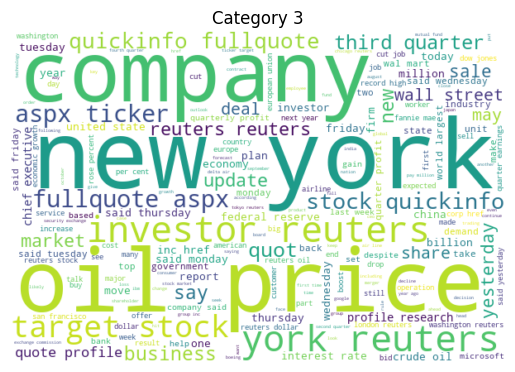

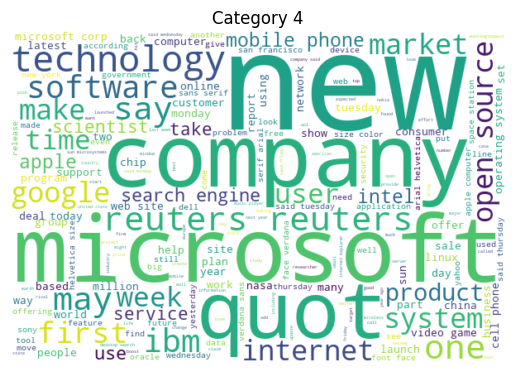

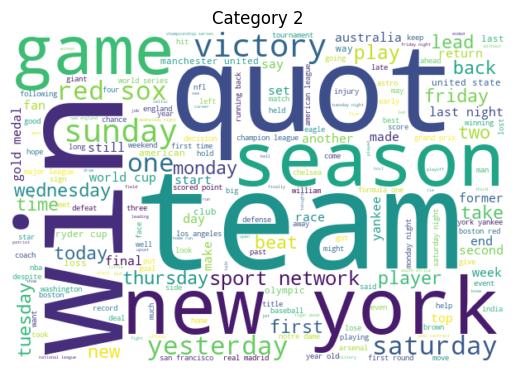

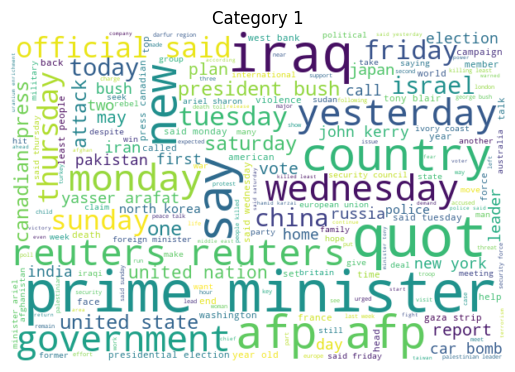

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

categories = dataframe["label"].unique()
for cat in categories:
    text = " ".join(dataframe[dataframe["label"] == cat]["clean_text"])
    wc = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Category {cat}")
    plt.axis("off")
    plt.show()
